In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.cm as cm

In [2]:
import mpl_aesth as mpla
mpla.adjust_rcParams(use_kpfonts=False, grid=True, dark_mode=False)

In [3]:
lorentz = np.linspace(1., 10, 1000)
zeta = np.logspace(-7, -1, 7)
chi = np.array([1.6, 10])
c, z, l = np.meshgrid(chi, zeta, lorentz, indexing='ij')

In [4]:
def vjh(lorentz, zeta, chi):
    a = np.sqrt(chi / ((1 + chi) * zeta))
    return np.sqrt(1. - 1. / (lorentz * lorentz)) / (1 + a / lorentz)

In [5]:
def v_from_lorentz(lorentz):
    return np.sqrt(1. - 1. / (lorentz * lorentz))

In [6]:
res = vjh(l, z, c)

/var/folders/k4/lpsdp38x2dg5krl9tpyrb8840000gn/T/ipykernel_85597/2053726914.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(lorentz, np.log10(res[i, j, :]), color=cm.copper_r(j/nz), ls=ls[i], label=(f'${np.log10(iz)}$' if i>0 else ''))
/var/folders/k4/lpsdp38x2dg5krl9tpyrb8840000gn/T/ipykernel_85597/2053726914.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(lorentz, np.log10(res[i, j, :]), color=cm.copper_r(j/nz), ls=ls[i], label=(f'${np.log10(iz)}$' if i>0 else ''))
/var/folders/k4/lpsdp38x2dg5krl9tpyrb8840000gn/T/ipykernel_85597/2053726914.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(lorentz, np.log10(res[i, j, :]), color=cm.copper_r(j/nz), ls=ls[i], label=(f'${np.log10(iz)}$' if i>0 else ''))
/var/folders/k4/lpsdp38x2dg5krl9tpyrb8840000gn/T/ipykernel_85597/2053726914.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(lorentz, np.log10(res[i, j, :]), color=cm.copper_r(j/nz), ls=ls[i], label=(f'${np.log10(

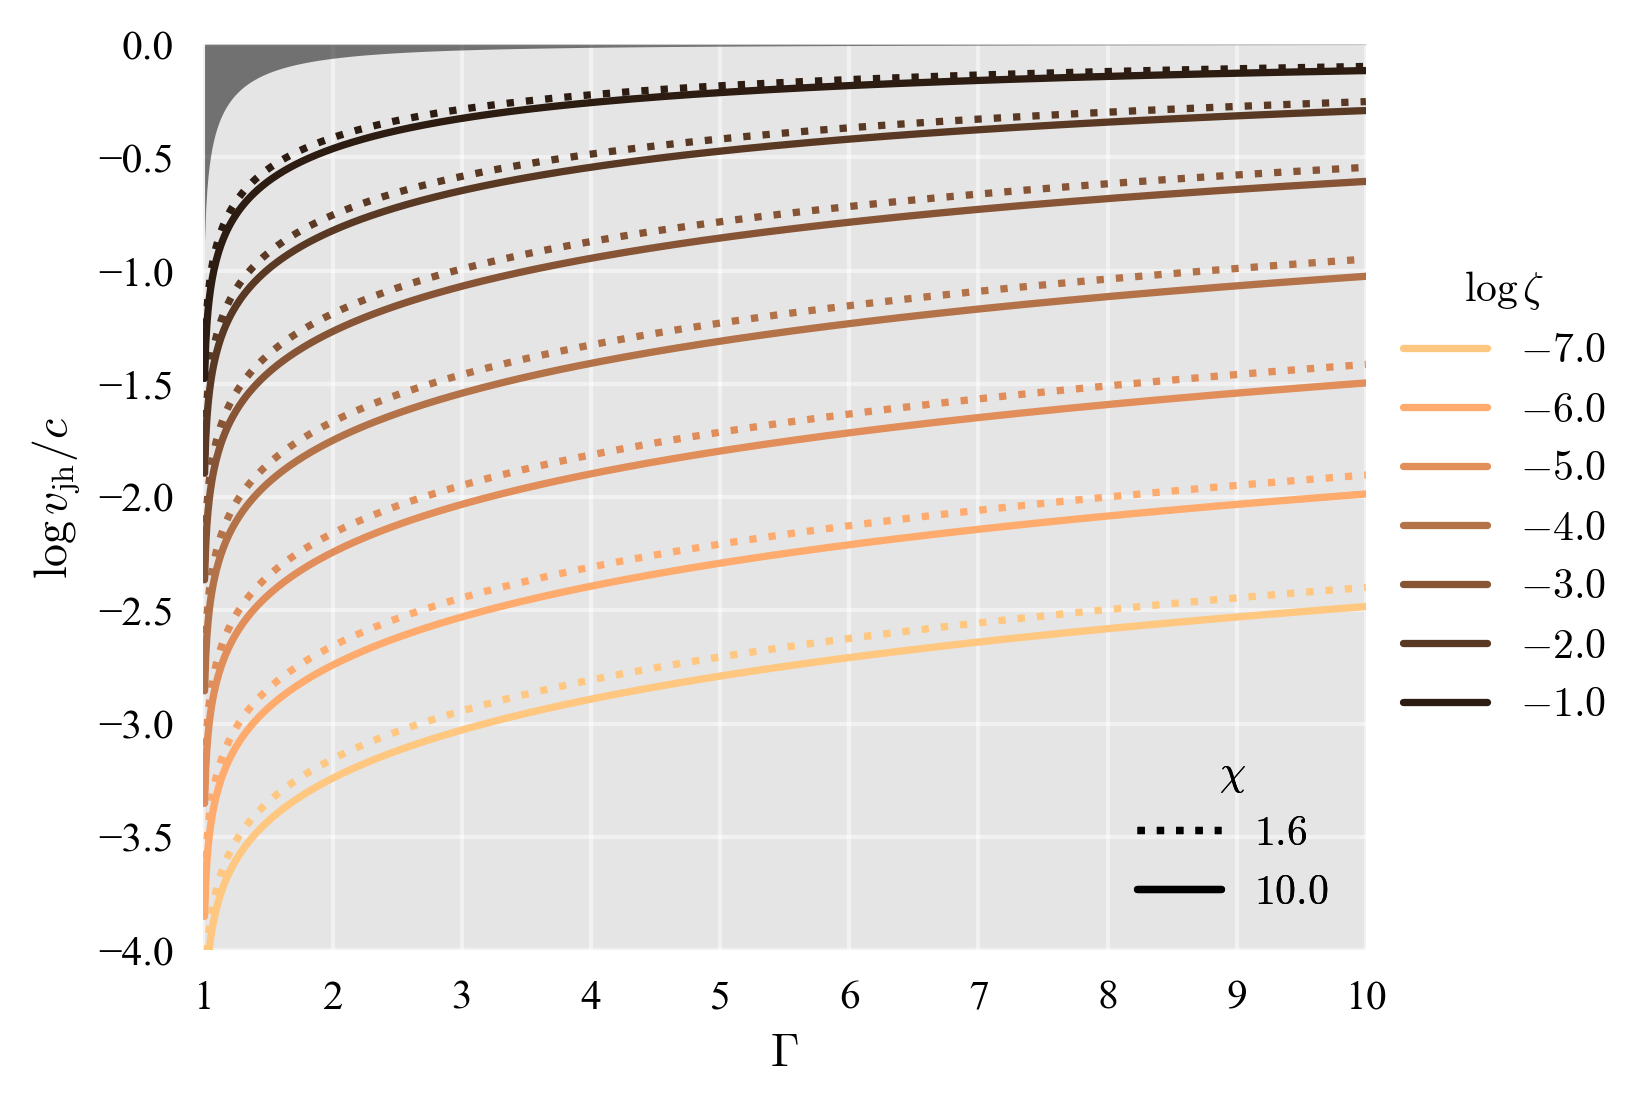

In [10]:
ncol = len(chi)
nz = len(zeta)
ls = [':', '-']
fig, axs = pl.subplots(1, 1, sharey=True, squeeze=True, gridspec_kw={'hspace':0, 'wspace':0}, figsize=(5, 4))
for i, ic in enumerate(chi):
    for j, iz in enumerate(zeta):
        pl.plot(lorentz, np.log10(res[i, j, :]), color=cm.copper_r(j/nz), ls=ls[i], label=(f'${np.log10(iz)}$' if i>0 else ''))

leg1 = pl.legend(title='$\log\zeta$', loc='center left', bbox_to_anchor=(1, 0.5))
axs.add_artist(leg1)
pl.xlim(1., 10)
pl.ylim(-4., 0)
pl.xlabel('$\Gamma$')
pl.ylabel('$\log v_\mathrm{jh}/c$')

leg_plots = []
for i, ic in enumerate(chi):
    l, = pl.plot(lorentz, -1 * np.log10(res[i, -1, :]), color='k', ls=ls[i], label=(f'${chi[i]}$'))
    leg_plots.append(l)

leg2 = pl.legend(leg_plots, [f'${chi[i]}$' for i in range(len(chi))], title='$\chi$')
axs.add_artist(leg2)

v_jet = np.log10(v_from_lorentz(lorentz))
axs.fill_between(lorentz, v_jet, 0, color='k', lw=0, alpha=0.5)

plt.savefig('jet_head_advance_speed.pdf', bbox_inches='tight')
plt.savefig('jet_head_advance_speed.png', bbox_inches='tight', dpi=300)